<a href="https://colab.research.google.com/github/guillotatis/talentotech/blob/main/AnalisisSentimientosGACT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install googletrans==3.1.0a0


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=b4e528a9bb2a723883569ad7fc06de98e49471ccd27299e063dccf6cc0ff0441
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [2]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator


In [3]:
def translateComment(strComment: str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text


In [4]:
def getPolarity(strComment: str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity


In [5]:
df = pd.read_csv('/content/Comentarios.csv')


In [6]:
df['polaridad'] = df['Comentario'].apply(getPolarity)


In [7]:
df.to_csv('resultados.csv', index=False)


In [8]:
df = pd.read_csv('/content/resultados.csv')
display(df)


,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



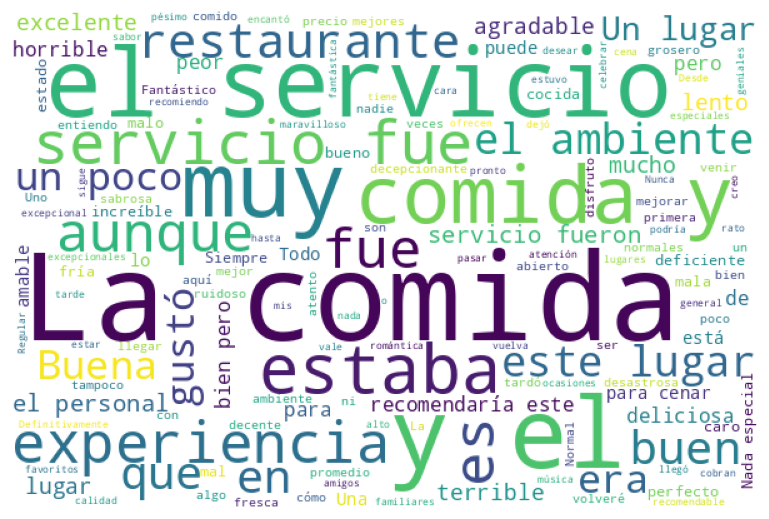

In [10]:
# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [14]:


def analyze_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)

df['vader_polarity'] = df['Comentario'].apply(analyze_vader_sentiment)
df[['neg', 'neu', 'pos', 'compound']] = df['vader_polarity'].apply(pd.Series)


In [15]:
df

,Comentario,polaridad,vader_polarity,neg,neu,pos,compound
0,La comida fue excelente y el servicio fue exce...,0.555556,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
1,El ambiente era agradable y la comida estaba d...,0.261458,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
2,"La comida estaba bien, pero el servicio fue le...",0.200000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.0,-0.5267
4,El peor restaurante en el que he estado. No lo...,-1.000000,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...",0.155,0.845,0.0,-0.2960
...,...,...,...,...,...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000
68,"La comida está bien, pero el ambiente no es mu...",0.208974,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",0.180,0.820,0.0,-0.2960
69,No me gustó la comida y el servicio fue muy de...,-0.520000,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",0.180,0.820,0.0,-0.2960


In [17]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [18]:
df['textblob_subjectivity'] = df['Comentario'].apply(get_subjectivity)

In [19]:
display(df)

,Comentario,polaridad,vader_polarity,neg,neu,pos,compound,textblob_subjectivity
0,La comida fue excelente y el servicio fue exce...,0.555556,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000,0.0
1,El ambiente era agradable y la comida estaba d...,0.261458,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000,0.0
2,"La comida estaba bien, pero el servicio fue le...",0.200000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000,0.0
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.0,-0.5267,0.0
4,El peor restaurante en el que he estado. No lo...,-1.000000,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...",0.155,0.845,0.0,-0.2960,0.0
...,...,...,...,...,...,...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000,0.3
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0.0000,0.0
68,"La comida está bien, pero el ambiente no es mu...",0.208974,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",0.180,0.820,0.0,-0.2960,0.0
69,No me gustó la comida y el servicio fue muy de...,-0.520000,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",0.180,0.820,0.0,-0.2960,0.0


In [20]:
from sklearn.feature_extraction.text import CountVectorizer



In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:

# Cargar stopwords en español
stop_words = stopwords.words('spanish')

# Aplicar en CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words, max_features=10)
X = vectorizer.fit_transform(df['Comentario'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [25]:
word_freq

,ambiente,aunque,bien,buen,buena,comida,experiencia,lugar,restaurante,servicio
0,0,0,0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
66,0,0,0,0,0,1,0,0,0,0
67,0,1,0,1,0,0,0,1,0,1
68,1,0,1,0,0,1,0,0,0,0
69,0,0,0,0,0,1,0,0,0,1
